In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os



In [3]:
def get_data():
    
    current_dir = os.getcwd()
    sub_dir  = os.path.join(current_dir, 'data/stock_data')
    fileholder = os.listdir(sub_dir)
    df_dir = {}
    for file in fileholder:
        if file.endswith('.csv'):
            src=os.path.join(sub_dir, file)
            df = pd.read_csv(src)
            keyText = os.path.splitext(file)[0]
            keyPfirst = str(keyText.split('_')[0])
            keyPlast = (keyText.split('_')[-1])
            
            key = (f'{keyPfirst}_{keyPlast}')
            df_dir[key] = df
    return df_dir

In [4]:
df_dir = get_data()
stock_names = {'AAPL': 'Apple Inc.', 'GOOGL': 'Google (GOOGL)', 'GOOG': 'Google (GOOG)', 'AMZN':'Amazon', '^GSPC':'S&P 500', 'TSLA':'Tesla', '^FTSE': 'FTSE 100', '^FTMC': 'FTSE 250' }

In [5]:
def get_name(key):
    key = key.split('_')[0]
    return stock_names[key]

In [6]:
def get_shape(interval):
    for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            print(f"Dataframe size for {company_name}:")
            print(df.shape)

In [7]:
interval = 'daily'

In [8]:
get_shape(interval)

Dataframe size for Apple Inc.:
(5033, 9)
Dataframe size for Google (GOOGL):
(4875, 9)
Dataframe size for Google (GOOG):
(4875, 9)
Dataframe size for Amazon:
(5033, 9)
Dataframe size for S&P 500:
(5033, 9)
Dataframe size for Tesla:
(3400, 9)
Dataframe size for FTSE 100:
(5050, 9)
Dataframe size for FTSE 250:
(5051, 9)


In [9]:
for key, df in df_dir.items():
        if key and key.endswith(interval):
            df.index = pd.to_datetime(df['Date']) 
            df = df.drop(['Date'], axis='columns') 
            print(df.head())
           

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-01-02  0.384821  0.388393  0.378214  0.380000   0.321272  144642400   
2004-01-05  0.382500  0.399821  0.382500  0.395893   0.334709  395018400   
2004-01-06  0.397321  0.400357  0.387679  0.394464   0.333501  509348000   
2004-01-07  0.394643  0.407679  0.391607  0.403393   0.341050  586874400   
2004-01-08  0.407857  0.423750  0.404464  0.417143   0.352675  460303200   

            Dividends  Stock Splits  
Date                                 
2004-01-02        0.0           0.0  
2004-01-05        0.0           0.0  
2004-01-06        0.0           0.0  
2004-01-07        0.0           0.0  
2004-01-08        0.0           0.0  
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.502503  2.604104  2.401401  2.51101

In [10]:
X= {}
y= {}
for key, df in df_dir.items():
        if key and key.endswith(interval):
            company_name = get_name(key)
            df['Pct Change'] = df['Adj Close'].pct_change()
            df['Moving Avg'] = df['Adj Close'].rolling(window=5).mean()
            
            df.dropna(inplace=True)
            
            X_var = df[['Pct Change', 'Moving Avg']]
            y_var = df['Adj Close']
            
            X[company_name]= X_var
            y[company_name]= y_var


In [11]:
split_percentage = 0.8
X_train = {}
X_test = {}
y_train = {}
y_test = {}

for company_name, X_var in X.items():
    split = int(split_percentage*len(X_var))
    X_train[company_name]= X_var[:split] 
    X_test[company_name] = X_var[split:]
    
for company_name, y_var in y.items():
    split = int(split_percentage*len(y_var)) 
    y_train[company_name] = y_var[:split]
    y_test[company_name] = y_var[split:]


In [12]:
for company_name in y_test:
    y = y_train[company_name]
    X = X_train[company_name]
    print(X.shape, y.shape)

(4023, 2) (4023,)
(3896, 2) (3896,)
(3896, 2) (3896,)
(4023, 2) (4023,)
(4023, 2) (4023,)
(2716, 2) (2716,)
(4036, 2) (4036,)
(4037, 2) (4037,)


In [13]:
classifiers= {}
for company_name in y_test:
    y = y_train[company_name]
    X = X_train[company_name]
    svm = SVR(kernel='rbf')
    cls = svm.fit(X, y)
    # You might want to store the classifier for each company
    # For example, in a dictionary
    classifiers[company_name] = cls
    

In [15]:
predictions = {}
for company_name in y_test:
    cls = classifiers[company_name]
    X = X_test[company_name]
    y_pred = cls.predict(X)
    predictions[company_name] = y_pred
    
    

Apple Inc.
Mean Absolute Error (MAE): 105.3045718310336
Mean Squared Error (MSE): 12728.508109054488
R-squared (R²): -10.275142204424245


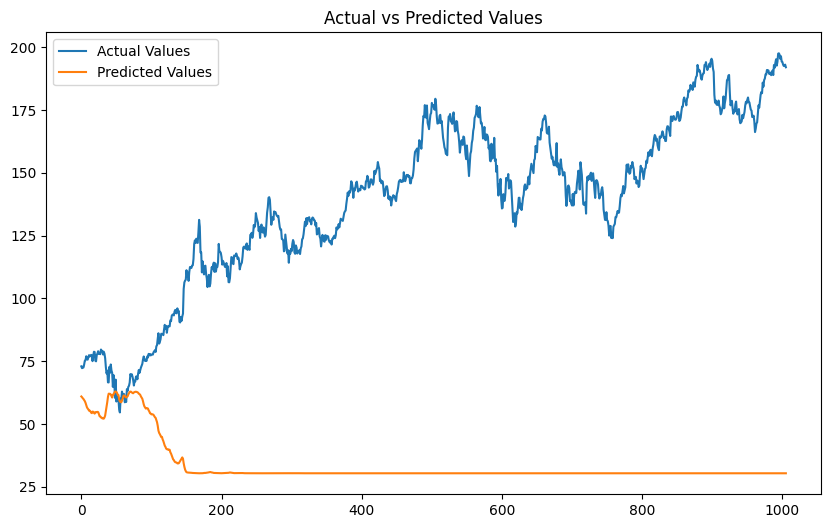

Google (GOOGL)
Mean Absolute Error (MAE): 63.49642909451664
Mean Squared Error (MSE): 5334.230927228377
R-squared (R²): -7.7734767947697385


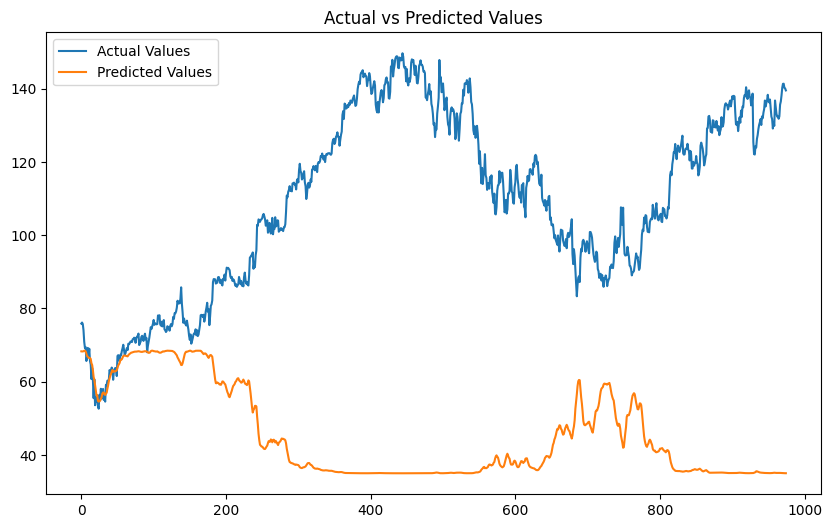

Google (GOOG)
Mean Absolute Error (MAE): 64.40055824458479
Mean Squared Error (MSE): 5470.6241497295505
R-squared (R²): -7.778851173451754


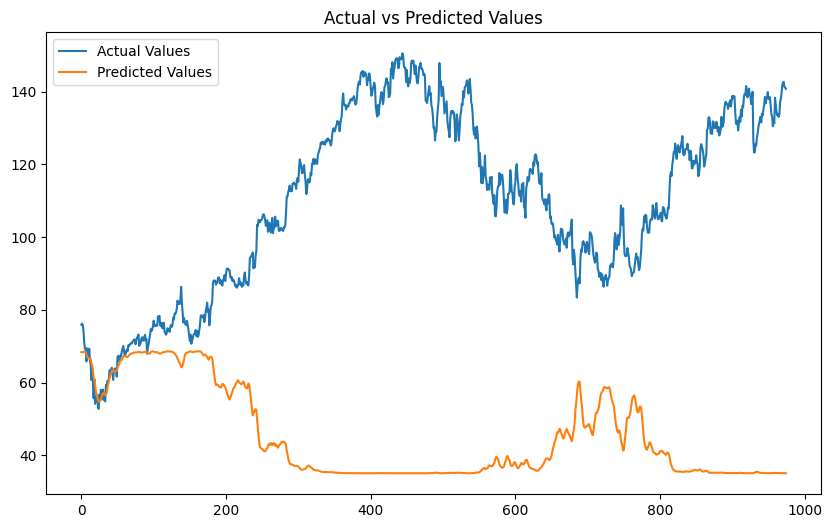

Amazon
Mean Absolute Error (MAE): 72.37664771830136
Mean Squared Error (MSE): 7349.582618581275
R-squared (R²): -8.750234666975729


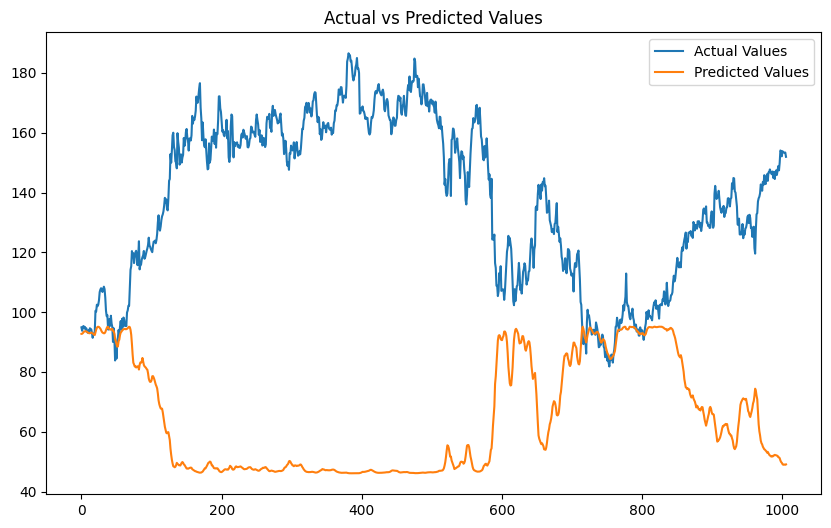

S&P 500
Mean Absolute Error (MAE): 1840.3941074250704
Mean Squared Error (MSE): 3885496.848768031
R-squared (R²): -13.163583328026878


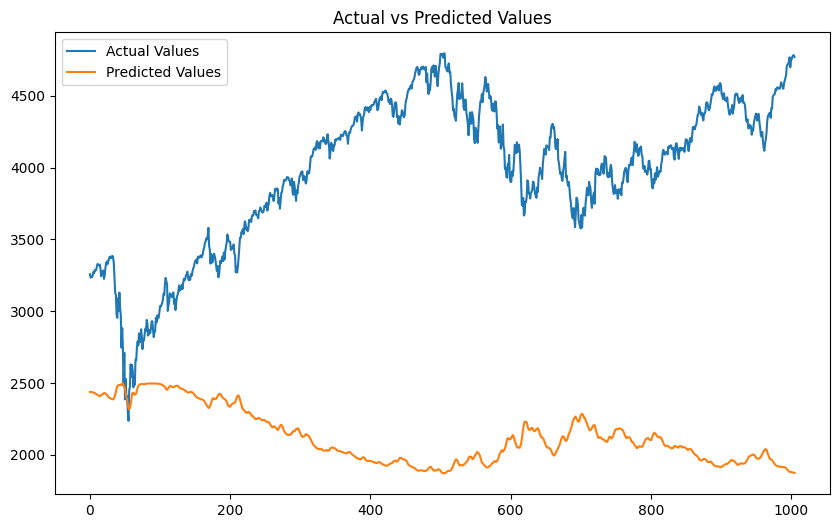

Tesla
Mean Absolute Error (MAE): 91.05199923044255
Mean Squared Error (MSE): 13643.95098860862
R-squared (R²): -3.097330223157207


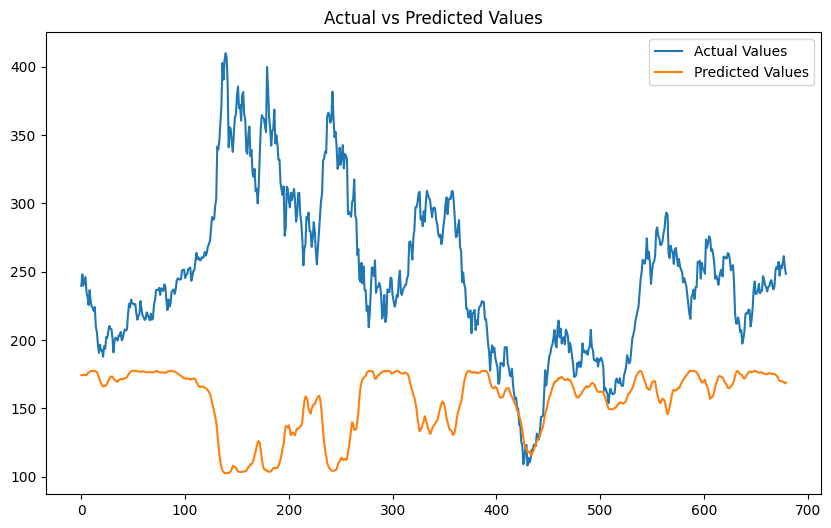

FTSE 100
Mean Absolute Error (MAE): 757.6898509091461
Mean Squared Error (MSE): 714453.7771930989
R-squared (R²): -0.8912760352817279


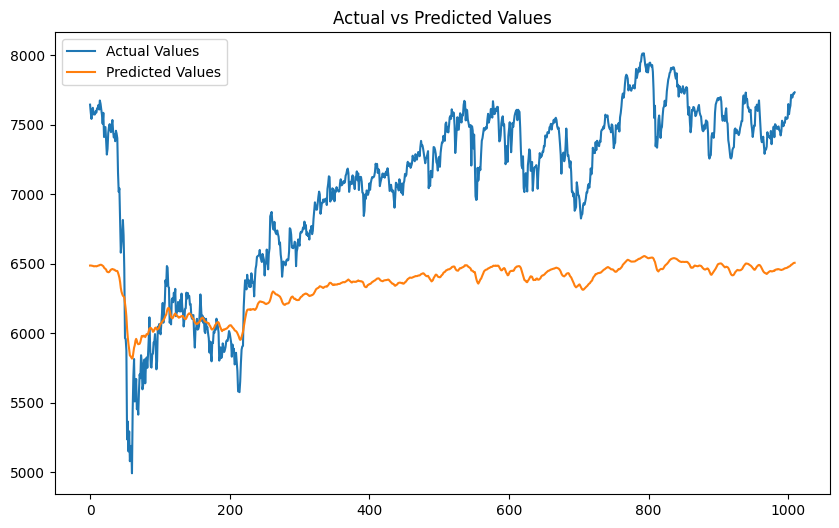

FTSE 250
Mean Absolute Error (MAE): 6821.694698760095
Mean Squared Error (MSE): 50801155.16323845
R-squared (R²): -9.751068029120274


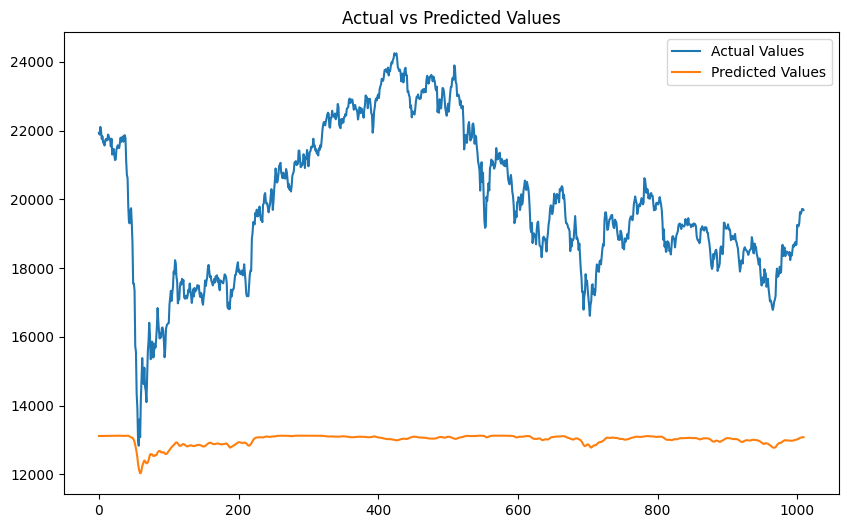

In [17]:
# Calculate and print regression metrics
for company_name in y_test:
    y = y_test[company_name]
    y_pred = predictions[company_name]
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{company_name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R²): {r2}')
    plt.figure(figsize=(10, 6))
    plt.plot(y.values, label='Actual Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.savefig(f'{company_name}_modelresultscharts.png')
    plt.legend()
    plt.show()
   